# 1.Review of generative models (30 pts) 

## a. Clustering data into K clusters using a mixture of Gaussians model.

### Answer: 
### 1. Generate a random number, k from 1, ..., K as the class identity. (Use the class prior probabilities to weight the choices.)

### 2. Sample a random Gaussian from a Gaussian distribution with mean $\mu_k$ and covariance $\Sigma_k$.

## b. Dimensionality reduction from $\mathbf{D}$-dimensional data to $\mathbf{M}$-dimensional data, using probabilistic PCA.

### Answer:
### Sample a random Gaussian n times from a Gaussian distribution with  $\{D \times 1\} $mean $\mu_k$ and $\{D \times D\} $covariance $\Sigma_k$.

## c. A linear dynamical system with Gaussian initial state, innovations, and observation noise (i.e., the generative model for a Kalman filter).

### Sample a random Gaussian variable $\{M\times1\}  z_1$ from a Gaussian distribution with $\{M\times1\}$ mean $\pi$ 
### and$\{M\times M\}$covariance V. Then, according to $z_t=Az_{t-1}+\xi_1$, with $\{M\times M\}$ A and $\{M\times1\}\xi_1$(latent noise)$\sim\mathcal{N}(0,Q)$ ,iteratively generate N=t 'latent variables'.
### Similarly, according to $x_t=Cz_t+\xi_2$, with$\{D\times M\}$ C and $\{D\times1\} \xi_2$(observation noise)$\sim\mathcal{N}(0,R)$, iteratively generate N=t 'observations'.

# 2. Convexity conditions for Poisson firing rate functions (30 pts)

### likelihood = log($\prod\frac{(e^{-g(x)})^{n_k}}{n_k!}e^{-e^{-g(x)}}$)
### let likelihood be the function of position x, f(x)
### f(x) = $\displaystyle\sum_{k=1}^{N}-n_kg(x)-\displaystyle\sum_{k=1}^{N}log(n_k!)-Ne^{-g(x)}$

### So, the first derivatives of the log likelihood
### $\frac{df(x)}{dx} = \displaystyle\sum_{k=1}^{N}-n_{k}\frac{dg(x)}{dx}+N\frac{dg(x)}{dx}e^{-g(x)}$
### The second derivatives of the log likelihood
### $\frac{d^2f(x)}{dx^2} = \displaystyle\sum_{k=1}^{N}-n_{k}\frac{d^2g(x)}{dx^2}+N\frac{d^2g(x)}{dx^2}e^{-g(x)}-N(\frac{dg(x)}{dx})^2e^{-g(x)}$

### Therefore, one condition on g(x) leading log likelihood was concave up(the second derivative was negative everywhere): $\frac{d^2g(x)}{dx^2}<0$ and $(\frac{d^2g(x)}{dx^2}-(\frac{dg(x)}{dx})^2)<0$

# 3.Single step of dynamical system estimation (40 pts)

In [1]:
import numpy as np
# load data from hw8problem3.npz
data=np.load('hw8problem3.npz')
r_max=data['MaxRates']
u=data['FieldCenters']
cov=data['FieldWidths']
observation=data['NeuralObservations']
data.close()

## a.

In [2]:
import math
x=np.arange(0,101)
t=0.25
likelihood=[]
for i in x:
    K=r_max*t*np.exp((-(i-u)**2)/(2*cov**2))
    nk_factorial=[math.factorial(l) for l in observation]
    likelihood1=sum(observation*np.log(K))-sum(K)-sum(np.log(nk_factorial))
    likelihood.append(likelihood1)

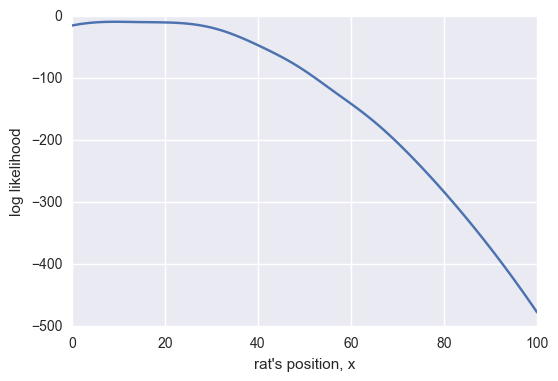

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.plot(x,likelihood)
plt.xlabel("rat's position, x")
plt.ylabel("log likelihood")

In [9]:
n2=np.argmax(likelihood)
print('the maximum likelihood position of the rat is %d'%n2)

the maximum likelihood position of the rat is 9


## b.

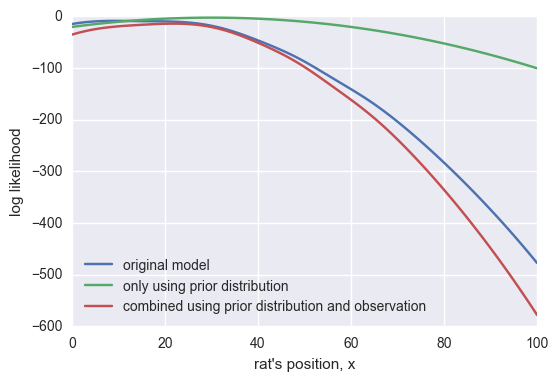

In [7]:
from scipy.stats import norm
prior_distribution=norm.logpdf(x,loc=30,scale=5)

posteriori_distribution=likelihood+prior_distribution
plt.plot(x,likelihood,label='original model')
plt.plot(x,prior_distribution,label='only using prior distribution')
plt.plot(x,posteriori_distribution,label='combined using prior distribution and observation')
plt.legend(loc='best')
plt.xlabel("rat's position, x")
plt.ylabel("log likelihood")

In [8]:
n=np.argmax(posteriori_distribution)
print('the maximum a posteriori position of the rat is %d'%n)

the maximum a posteriori position of the rat is 22
